# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# config and query formation
# url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"

# query = f"{url}appid={weather_api_key}&q="
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"
query_url = base_url + "&appid=" + weather_api_key + "&q="
# response = requests.get(f'{query_url}{city}').json()
# pprint(response)

#make empty lists for response input
lat = []
long = []
city_names = []
country = []
date = []
temp_max = []
cloudiness = []
humidity = []
wind_speed = []

#create for loop to append data into each list, use try/except in case of nonexistent cities
for city in cities:
    try:
        response = requests.get(f'{query_url}{city}').json()
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        city_names.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        temp_max.append(response["main"]["temp_max"])
        cloudiness.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        wind_speed.append(response["wind"]["speed"])
        city_count = len(city_names)
        print(f"City number {city_count} ({city}) added.")
        print("-----")
    except KeyError:
        print("City not found, skipping.")
        print("-----")

City number 1 (ambon) added.
-----
City number 2 (monywa) added.
-----
City number 3 (ushuaia) added.
-----
City number 4 (khasan) added.
-----
City number 5 (dikson) added.
-----
City number 6 (avarua) added.
-----
City number 7 (owando) added.
-----
City number 8 (mani) added.
-----
City number 9 (mataura) added.
-----
City number 10 (okhotsk) added.
-----
City number 11 (kapaa) added.
-----
City number 12 (manokwari) added.
-----
City not found, skipping.
-----
City number 13 (bullhead city) added.
-----
City number 14 (cidreira) added.
-----
City number 15 (puerto ayora) added.
-----
City number 16 (khatanga) added.
-----
City number 17 (guisa) added.
-----
City number 18 (hobart) added.
-----
City number 19 (sur) added.
-----
City number 20 (qaqortoq) added.
-----
City number 21 (kampene) added.
-----
City number 22 (vaini) added.
-----
City not found, skipping.
-----
City number 23 (chuy) added.
-----
City number 24 (saint-pierre) added.
-----
City number 25 (atikokan) added.
---

City number 194 (dalby) added.
-----
City number 195 (kilindoni) added.
-----
City number 196 (ribeira grande) added.
-----
City number 197 (tiarei) added.
-----
City number 198 (gopalpur) added.
-----
City number 199 (souillac) added.
-----
City number 200 (ancud) added.
-----
City number 201 (saskylakh) added.
-----
City number 202 (tsabong) added.
-----
City number 203 (linhares) added.
-----
City number 204 (kholodnyy) added.
-----
City number 205 (raudeberg) added.
-----
City number 206 (griffin) added.
-----
City number 207 (kavieng) added.
-----
City not found, skipping.
-----
City number 208 (iqaluit) added.
-----
City number 209 (katsuura) added.
-----
City number 210 (nenjiang) added.
-----
City number 211 (lamu) added.
-----
City number 212 (port hedland) added.
-----
City number 213 (yantal) added.
-----
City number 214 (marsa matruh) added.
-----
City number 215 (namibe) added.
-----
City not found, skipping.
-----
City number 216 (toora-khem) added.
-----
City not found, 

City number 384 (pacific grove) added.
-----
City number 385 (blyth) added.
-----
City number 386 (chaumont) added.
-----
City number 387 (lexington) added.
-----
City number 388 (cururupu) added.
-----
City number 389 (mackay) added.
-----
City number 390 (mayo) added.
-----
City number 391 (kuzino) added.
-----
City number 392 (ozinki) added.
-----
City number 393 (kyabe) added.
-----
City number 394 (ales) added.
-----
City number 395 (vaitape) added.
-----
City number 396 (san ignacio) added.
-----
City number 397 (digha) added.
-----
City number 398 (griffith) added.
-----
City number 399 (victoria) added.
-----
City number 400 (saryagash) added.
-----
City number 401 (poum) added.
-----
City number 402 (lagoa) added.
-----
City number 403 (arica) added.
-----
City number 404 (wonthaggi) added.
-----
City number 405 (luba) added.
-----
City number 406 (san jose) added.
-----
City number 407 (latung) added.
-----
City number 408 (gudivada) added.
-----
City number 409 (muisne) adde

City number 581 (jijiga) added.
-----
City number 582 (ardakan) added.
-----


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
dict_wthr = { 
    "Lat": lat,
    "Long": long,
    "City": city_names,
    "Country": country,
    "Date": date,
    "Max Temp": temp_max, 
    "Cloudiness": cloudiness,
    "Humidity": humidity,
    "Wind Speed": wind_speed
}
weather_df = pd.DataFrame(dict_wthr)
weather_df.head()

,Lat,Long,City,Country,Date,Max Temp,Cloudiness,Humidity,Wind Speed
0,-3.6954,128.1814,Ambon City,ID,1666308834,82.54,20,78,3.44
1,22.1167,95.1333,Monywa,MM,1666308834,73.72,0,84,5.77
2,-54.8000,-68.3000,Ushuaia,AR,1666308834,44.22,20,61,25.32
3,42.4308,130.6434,Khasan,RU,1666308835,54.54,100,60,0.87
4,73.5069,80.5464,Dikson,RU,1666308835,32.11,100,98,16.08


In [5]:
weather_df.to_csv(r"../output_data/weather_csv.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_df[weather_df["Humidity"] > 100].nunique()

Lat           0
Long          0
City          0
Country       0
Date          0
Max Temp      0
Cloudiness    0
Humidity      0
Wind Speed    0
dtype: int64

In [7]:
#  Get the indices of cities that have humidity over 100%.

# No cities with humidity >100%, skipping.

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

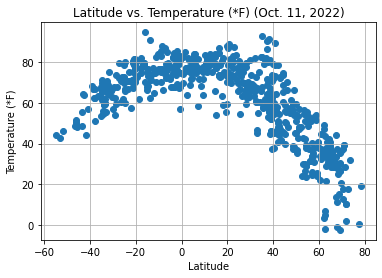

This plot compares latitude and max temperature in each city within the dataframe. There is a readable tendency that as the cities get closer to the equator, the max temp increases.


<Figure size 432x288 with 0 Axes>

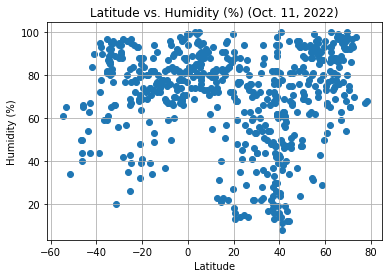

This plot compares latitude and humidity percentage in each city within the dataframe.The tendency here seems to be a correlation between higher latitude and higher humidity.


<Figure size 432x288 with 0 Axes>

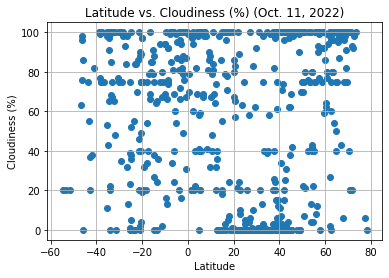

This plot compares latitude and cloud coverage (as a percentage) in each city within the dataframe. There is no readable tendency or trend here.


<Figure size 432x288 with 0 Axes>

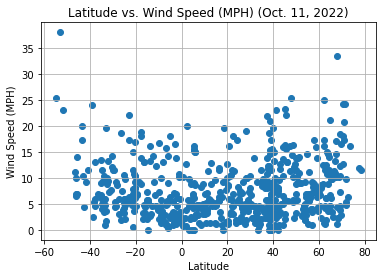

This plot compares latitude and wind speed (miles per hour) in each city within the dataframe. Same as cloud coverage, there is no readable tendency or trend here.


<Figure size 432x288 with 0 Axes>

In [9]:
#set up variables to use in for loop
lat_plt = weather_df["Lat"]
temp_plt = weather_df["Max Temp"]
humidity_plt = weather_df["Humidity"]
cloud_plt = weather_df["Cloudiness"]
wind_plt = weather_df["Wind Speed"]
date = "Oct. 11, 2022"

#need lists to iterate in for loops
y_data = [temp_plt, humidity_plt, cloud_plt, wind_plt]
y_labels = ["Temperature (*F)", "Humidity (%)", "Cloudiness (%)", "Wind Speed (MPH)"]

# run through loop to create each requested plot

for data in range(4):
    plt.figure()
    plt.scatter(lat_plt, y_data[data])

    # Set labels for each looped plot
    plt.title(f"Latitude vs. {y_labels[data]} ({date})")
    plt.xlabel("Latitude")
    plt.ylabel(f"{y_labels[data]}")
    plt.grid()

    plt.show()
    
    # Save each plot as png
    plt.savefig(f"../output_data/plot{data + 1}.png")
    
    # explain each plot
    if y_labels[data] == "Temperature (*F)":
        print("This plot compares latitude and max temperature in each city within the dataframe. There is a readable tendency that as the cities get closer to the equator, the max temp increases.")
    elif y_labels[data] == "Humidity (%)":
        print("This plot compares latitude and humidity percentage in each city within the dataframe.The tendency here seems to be a correlation between higher latitude and higher humidity.")
    elif y_labels[data] == "Cloudiness (%)":
        print("This plot compares latitude and cloud coverage (as a percentage) in each city within the dataframe. There is no readable tendency or trend here.")
    elif y_labels[data] == "Wind Speed (MPH)":
        print(f"This plot compares latitude and wind speed (miles per hour) in each city within the dataframe. Same as cloud coverage, there is no readable tendency or trend here.")

## Latitude vs. Humidity Plot

In [12]:
#this plot is coded and displays within the above loop

## Latitude vs. Cloudiness Plot

In [13]:
#this plot is coded and displays within the above loop

## Latitude vs. Wind Speed Plot

In [14]:
#this plot is coded and displays within the above loop

## Linear Regression

r-squared value: 0.6937791908566624


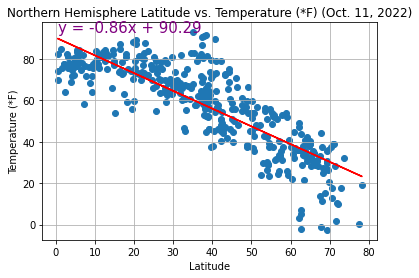

r-squared value: 0.5315028487073564


<Figure size 432x288 with 0 Axes>

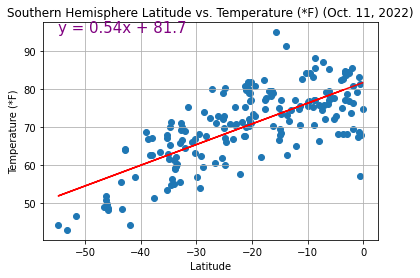

These plots compare the max temps with the latitudes of each city within the southern and northern hemispheres. Given the strong r-squared value, it is notable that the farther north a northern-hemisphere city is from the equator, the colder it is, while the northern-most cities of the southern-hemisphere are closer to the equator and noticeably warmer.
r-squared value: 0.0072873034943926


<Figure size 432x288 with 0 Axes>

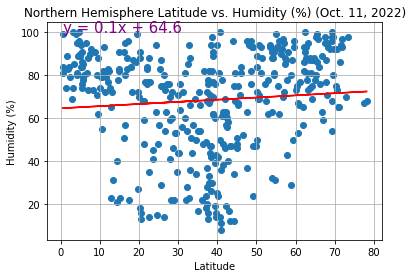

r-squared value: 0.029186167871703635


<Figure size 432x288 with 0 Axes>

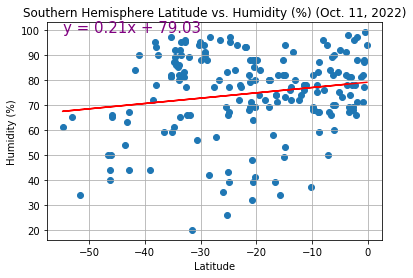

These plots compare the humidities with the latitudes of each city within the southern and northern hemispheres. It seems in both hemispheres, the farther north a city is, the more humid it gets. However, the r-squared value is not very strong, meaning this observation is not truely accurate.
r-squared value: 0.034917146295352496


<Figure size 432x288 with 0 Axes>

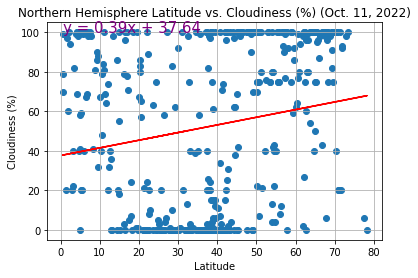

r-squared value: 0.017463970519567506


<Figure size 432x288 with 0 Axes>

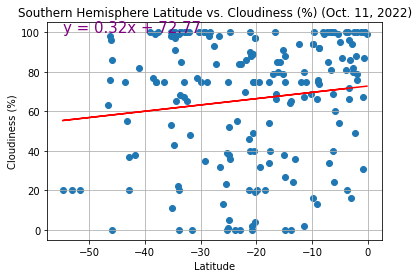

These plots compare the cloudiness with the latitudes of each city within the southern and northern hemispheres. Again, as the cities in each hemisphere are farther north, cloudiness seems to increase, however with the weak r-squared value, this is not a reliable observation.
r-squared value: 0.06807375338495954


<Figure size 432x288 with 0 Axes>

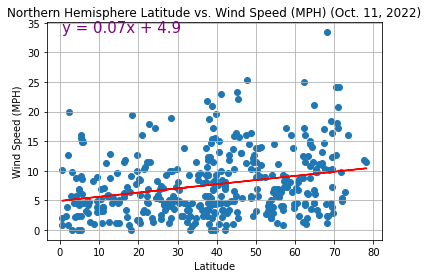

r-squared value: 0.13015019833511984


<Figure size 432x288 with 0 Axes>

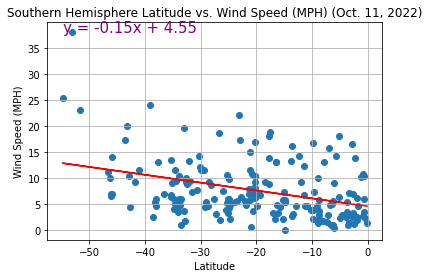

These plots compare the wind speeds with the latitudes of each city within the southern and northern hemispheres. It appears that the closer a city is to the equator, the windier it gets. However, both r-squared values are once again weak, meaning this is not a reliable observation.


<Figure size 432x288 with 0 Axes>

In [10]:
#Similar process as above, but splitting lat into hemispheres and adding regression
nlat = weather_df[weather_df["Lat"] > 0]
slat = weather_df[weather_df["Lat"] < 0]

nlat_plt = nlat["Lat"]
ntemp_plt = nlat["Max Temp"]
nhumidity_plt = nlat["Humidity"]
ncloud_plt = nlat["Cloudiness"]
nwind_plt = nlat["Wind Speed"]

slat_plt = slat["Lat"]
stemp_plt = slat["Max Temp"]
shumidity_plt = slat["Humidity"]
scloud_plt = slat["Cloudiness"]
swind_plt = slat["Wind Speed"]

reg_data_x = [nlat_plt, slat_plt, nlat_plt, slat_plt, nlat_plt, slat_plt, nlat_plt, slat_plt]
reg_data_y = [ntemp_plt, stemp_plt, nhumidity_plt, shumidity_plt, ncloud_plt, scloud_plt, nwind_plt, swind_plt]
reg_labels_x = ["Northern Hemisphere Latitude", "Southern Hemisphere Latitude", "Northern Hemisphere Latitude", "Southern Hemisphere Latitude", "Northern Hemisphere Latitude", "Southern Hemisphere Latitude", "Northern Hemisphere Latitude", "Southern Hemisphere Latitude"]
reg_labels_y = ["Temperature (*F)", "Temperature (*F)", "Humidity (%)", "Humidity (%)", "Cloudiness (%)", "Cloudiness (%)", "Wind Speed (MPH)", "Wind Speed (MPH)"]

for data in range(8):
    plt.figure()
    plt.scatter(reg_data_x[data], reg_data_y[data])

    plt.title(f"{reg_labels_x[data]} vs. {reg_labels_y[data]} ({date})")
    plt.xlabel("Latitude")
    plt.ylabel(f"{reg_labels_y[data]}")
    plt.grid()
    
    # add regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(reg_data_x[data], reg_data_y[data])
    r_squared = rvalue**2
    print(f"r-squared value: {r_squared}")
    regress_values = reg_data_x[data] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(reg_data_x[data],regress_values,"r-")
    plt.annotate(line_eq,(reg_data_x[data].min(),reg_data_y[data].max()),fontsize=15,color="purple")
    
    plt.show()
 
    plt.savefig(f"../output_data/plot{data + 5}.png")
    
    if (reg_labels_x[data] == "Southern Hemisphere Latitude" and reg_labels_y[data] == "Temperature (*F)"):
        print("These plots compare the max temps with the latitudes of each city within the southern and northern hemispheres. Given the strong r-squared value, it is notable that the farther north a northern-hemisphere city is from the equator, the colder it is, while the northern-most cities of the southern-hemisphere are closer to the equator and noticeably warmer.")
    elif (reg_labels_x[data] == "Southern Hemisphere Latitude" and reg_labels_y[data] == "Humidity (%)"):
        print("These plots compare the humidities with the latitudes of each city within the southern and northern hemispheres. It seems in both hemispheres, the farther north a city is, the more humid it gets. However, the r-squared value is not very strong, meaning this observation is not truely accurate.")
    elif (reg_labels_x[data] == "Southern Hemisphere Latitude" and reg_labels_y[data] == "Cloudiness (%)"):
        print("These plots compare the cloudiness with the latitudes of each city within the southern and northern hemispheres. Again, as the cities in each hemisphere are farther north, cloudiness seems to increase, however with the weak r-squared value, this is not a reliable observation.")
    elif (reg_labels_x[data] == "Southern Hemisphere Latitude" and reg_labels_y[data] == "Wind Speed (MPH)"):
        print("These plots compare the wind speeds with the latitudes of each city within the southern and northern hemispheres. It appears that the closer a city is to the equator, the windier it gets. However, both r-squared values are once again weak, meaning this is not a reliable observation.")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [15]:
#this plot is coded and displays within the above loop

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [16]:
#this plot is coded and displays within the above loop

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [17]:
#this plot is coded and displays within the above loop

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [18]:
#this plot is coded and displays within the above loop

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [19]:
#this plot is coded and displays within the above loop

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [20]:
#this plot is coded and displays within the above loop

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [21]:
#this plot is coded and displays within the above loop

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [22]:
#this plot is coded and displays within the above loop

In [11]:
# Written Analysis of WeatherPy:
# 1. The only reliable observation of weather between hemispheres was in regards to temperature, where the closer a city is to the equator, the warmer its max temp is.
# 2. With the collection of cities in the df I ran, it seemed that there were more cities closer to the equator than there were on the outer rims of each hemisphere.
# 3. Since the r-squared values for wind speed and cloudiness were both very weak, any readable tendencies weren't reliable. I would be interested to see if other geographic features create a stronger/more reliable r-squared value for those two weather observations.